Question 1

In [36]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter='|')

# Step 4. Discover what is the mean age per occupation:
occupation_age = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:")
print(occupation_age)

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least:
def male_ratio(group):
    male = (group['gender'] == 'M').sum()
    total = group['gender'].count()
    return male / total

occupation_male_ratio = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):")
print(occupation_male_ratio)

# Step 6. For each occupation, calculate the minimum and maximum ages:
occupation_age_range = users.groupby('occupation')['age'].agg([min, max])
print("\nMinimum and maximum ages per occupation:")
print(occupation_age_range)

# Step 7. For each combination of occupation and sex, calculate the mean age:
occupation_sex_age = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age for each combination of occupation and sex:")
print(occupation_sex_age)

# Step 8. For each occupation present the percentage of women and men:
occupation_counts = users.groupby('occupation')['gender'].count()
occupation_gender_counts = users.groupby('occupation')['gender'].value_counts()
occupation_gender_percentages = occupation_gender_counts / occupation_counts * 100
print("\nPercentage of men and women for each occupation:")
print(occupation_gender_percentages)


Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other      

Question 2

In [28]:
import pandas as pd

# Step 2. Import the dataset from this address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/euro2012.csv"
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12["Goals"]

# Step 5. How many team participated in the Euro2012?
num_teams = euro12["Team"].nunique()
print("Number of teams participated in Euro2012:", num_teams)

# Step 6. What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("Number of columns in the dataset:", num_columns)

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(["Red Cards", "Yellow Cards"], ascending = False)

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = euro12["Yellow Cards"].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards)

# Step 10. Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12["Goals"] > 6]["Team"]
print("Teams that scored more than 6 goals:", list(high_scoring_teams))

# Step 11. Select the teams that start with G
G_teams = euro12[euro12["Team"].str.startswith("G")]["Team"]
print("Teams that start with G:", list(G_teams))

# Step 12. Select the first 7 columns
first_7_cols = euro12.iloc[:, :7]
print(first_7_cols)

# Step 13. Select all columns except the last 3
all_except_last_3_cols = euro12.iloc[:, :-3]
print(all_except_last_3_cols)

# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]
print(shooting_accuracy)

HTTPError: HTTP Error 404: Not Found

Question 3

In [25]:
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as np
#Step 2. Create 3 differents Series, each of length 100, as follows: • The first a random number from 1 to 4 • The second a random number from 1 to 3 • The third a random number from 10,000 to 30,000

# First Series
bedrs = pd.Series(np.random.randint(1, 5, size=100))

# Second Series
bathrs = pd.Series(np.random.randint(1, 4, size=100))

# Third Series
price_sqr_meter = pd.Series(np.random.randint(10000, 30001, size=100))
#Step 3. Create a DataFrame by joinning the Series by column

df = pd.concat([bedrs, bathrs, price_sqr_meter], axis=1)
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([bedrs, bathrs, price_sqr_meter], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
#Step 6. Ops it seems it is going only until index 99. Is it true?

print(bigcolumn.tail())
         
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True, inplace=True)

         0
295  26539
296  11677
297  19628
298  12315
299  14681


Question 4

In [2]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
data = pd.read_csv('wind1.txt', delimiter='\s+', na_values='NaN')

# Step 3
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']])
data = data.drop(columns=['Yr', 'Mo', 'Dy']).set_index('date')

# Step 4
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Step 5
data.index = pd.to_datetime(data.index)

# Step 6
missing_values = data.isna().sum()

# Step 7
non_missing_values = data.count().sum()

# Step 8
mean_wind_speed = data.mean().mean()

# Step 9
loc_stats = pd.DataFrame({'min': data.min(), 'max': data.max(), 'mean': data.mean(), 'std': data.std()})

# Step 10
day_stats = pd.DataFrame({'min': data.min(axis=1), 'max': data.max(axis=1), 'mean': data.mean(axis=1), 'std': data.std(axis=1)})

# Step 11
january_data = data[data.index.month == 1]
january_avg = january_data.mean()

# Step 12
yearly_data = data.resample('Y').mean()

# Step 13
monthly_data = data.resample('M').mean()

# Step 14
weekly_data = data.resample('W').mean()

# Step 15
weekly_stats = pd.DataFrame({'min': weekly_data.min(axis=1), 'max': weekly_data.max(axis=1), 'mean': weekly_data.mean(axis=1), 'std': weekly_data.std(axis=1)})
weekly_stats_first_52_weeks = weekly_stats[:52]


EmptyDataError: No columns to parse from file

Question 5

In [23]:
#Step 1: Import necessary libraries
import pandas as pd

#Step 2: Import dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

#Step 4: See the first 10 entries
print(chipo.head(10))

#Step 5: Number of observations in the dataset
print("Number of observations:", len(chipo))

#Step 6: Number of columns in the dataset
print("Number of columns:", len(chipo.columns))

#Step 7: Name of all columns
print("Columns:", chipo.columns.tolist())

#Step 8: How is the dataset indexed?
print("Index:", chipo.index)

#Step 9: Most-ordered item
most_ordered_item = chipo.groupby("item_name").sum().sort_values("quantity", ascending=False).index[0]
print("Most-ordered item:", most_ordered_item)

#Step 10: Number of items ordered for most-ordered item
items_ordered = chipo.groupby("item_name").sum().sort_values("quantity", ascending=False)["quantity"][0]
print("Number of items ordered:", items_ordered)

#Step 11: Most-ordered item in the choice_description column
most_ordered_description = chipo.groupby("choice_description").sum().sort_values("quantity", ascending=False).index[0]
print("Most-ordered item in choice_description:", most_ordered_description)

#Step 12: Total number of items ordered
total_items_ordered = chipo["quantity"].sum()
print("Total number of items ordered:", total_items_ordered)

#Step 13: Convert item price to float
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:-1]))
print("Item price type:", type(chipo["item_price"][0]))

#Step 14: Revenue for the period
revenue = (chipo["quantity"] * chipo["item_price"]).sum()
print("Revenue:", revenue)

#Step 15: Number of orders made
num_orders = len(chipo["order_id"].unique())
print("Number of orders:", num_orders)

#Step 16: Average revenue per order
avg_revenue_per_order = revenue / num_orders
print("Average revenue per order:", avg_revenue_per_order)

#Step 17: Number of different items sold
num_items_sold = len(chipo["item_name"].unique())
print("Number of different items sold:", num_items_sold)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

Question 6

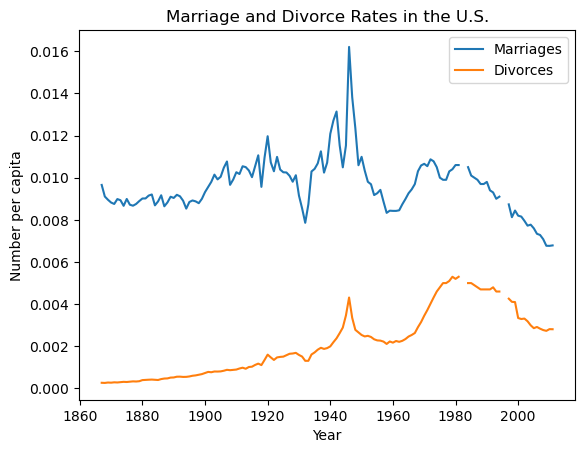

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("us-marriages-divorces-1867-2014.csv", index_col=0)

marriages = data["Marriages"]/data["Population"]
divorces = data["Divorces"]/data["Population"]

marriage_divorce_rates = pd.DataFrame({"Marriages": marriages, "Divorces": divorces})
marriage_divorce_rates.plot()
plt.xlabel("Year")
plt.ylabel("Number per capita")
plt.title("Marriage and Divorce Rates in the U.S.")
plt.legend()
plt.show()

Question 7

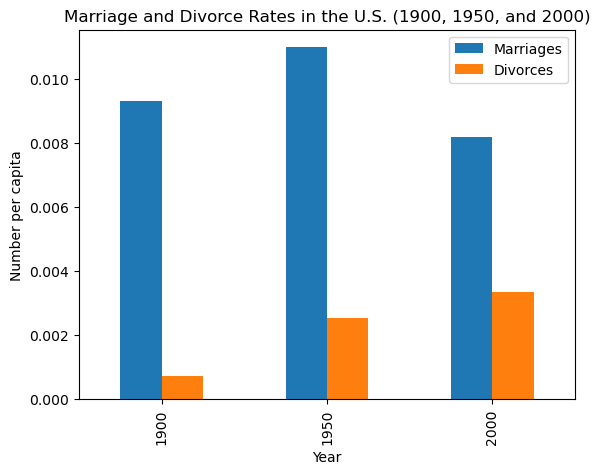

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("us-marriages-divorces-1867-2014.csv", index_col=0)

years = [1900, 1950, 2000]

marriages = data.loc[years]["Marriages"]/data.loc[years]["Population"]
divorces = data.loc[years]["Divorces"]/data.loc[years]["Population"]

marriage_divorce_rates = pd.DataFrame({"Marriages": marriages, "Divorces": divorces})
marriage_divorce_rates.plot.bar()
plt.xlabel("Year")
plt.ylabel("Number per capita")
plt.title("Marriage and Divorce Rates in the U.S. (1900, 1950, and 2000)")
plt.show()

Question 8

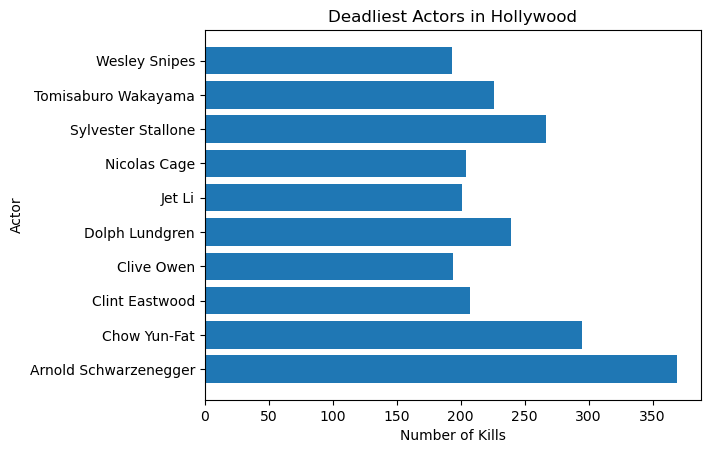

In [49]:
import matplotlib.pyplot as plt

# Define the data for the chart
actors = ['Arnold Schwarzenegger','Chow Yun-Fat','Clint Eastwood','Clive Owen','Dolph Lundgren','Jet Li','Nicolas Cage','Sylvester Stallone','Tomisaburo Wakayama','Wesley Snipes']
kill_counts = [369,295,207,194,239,201,204,267,226,193]

# Create the horizontal bar chart
fig, ax = plt.subplots()
ax.barh(actors, kill_counts)

# Set chart title and axis labels
ax.set_title('Deadliest Actors in Hollywood')
ax.set_xlabel('Number of Kills')
ax.set_ylabel('Actor')

# Show the chart
plt.show()


Question 9

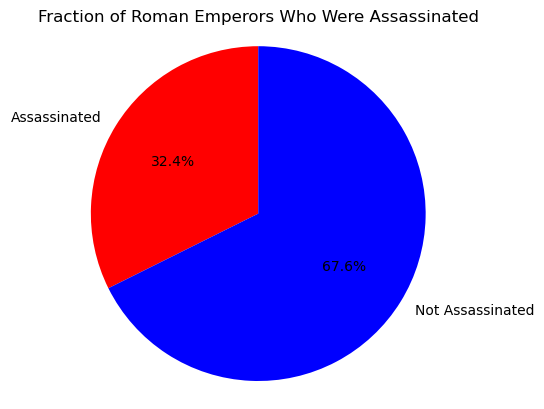

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors who were assassinated
num_assassinated = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Calculate the number of emperors who were not assassinated
num_not_assassinated = data[data['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Create a list of the counts
counts = [num_assassinated, num_not_assassinated]

# Create a list of the labels
labels = ['Assassinated', 'Not Assassinated']

# Create a list of the colors
colors = ['red', 'blue']

# Create the pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Make the pie chart a perfect circle
plt.axis('equal')

# Add a title
plt.title('Fraction of Roman Emperors Who Were Assassinated')

# Show the plot
plt.show()

Question 10

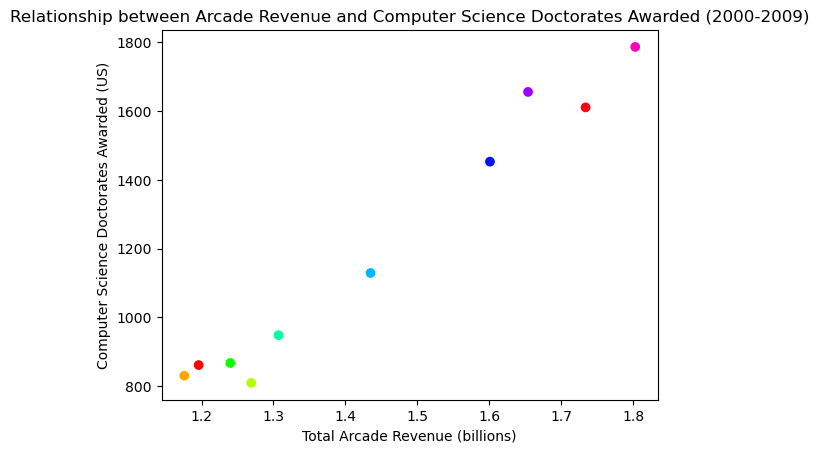

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Extract the columns we're interested in
revenue = df['Total Arcade Revenue (billions)']
doctorates = df['Computer Science Doctorates Awarded (US)']

# Create a list of colors, one for each year
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray']

# Create a scatter plot
plt.scatter(revenue, doctorates, c=df['Year'], cmap='hsv')

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates Awarded (2000-2009)')

# Show the plot
plt.show()